This code implements a quantum circuit simulator using matrix multiplication to represent quantum gates and states. It initializes a state vector representing the quantum state of multiple qubits, applies quantum gates (Pauli-X, Hadamard, and CNOT), and measures the runtime as a function of the number of qubits.

#initial_state(num_qubits)

##Description#:
Initializes the quantum state to the |0...0⟩ state for num_qubits qubits.
Parameters:
##num_qubits (int):
The number of qubits in the quantum state.
Returns: A 1D numpy array representing the initial state vector.

In [17]:
# Initial |0...0> state for n qubits
def initial_state(num_qubits):
    state = np.array([1, 0])  # Single qubit |0>
    for _ in range(num_qubits - 1):
        state = np.kron(state, np.array([1, 0]))
    return state

#apply_gate(state, gate, qubit, num_qubits)

##Description:
Applies a single-qubit gate to the specified qubit in the quantum state using the Kronecker product.
##Parameters:
###state (ndarray):
The current state vector of the quantum system.
###gate (ndarray):
The matrix representation of the quantum gate to apply (e.g., X, H).
###qubit (int):
The index of the qubit to which the gate will be applied.
###num_qubits (int):
The total number of qubits in the system.
###Returns:
The updated state vector after applying the gate.

In [18]:
# Function to apply Kronecker products for n qubits
def apply_gate(state, gate, qubit, num_qubits):
    gate_list = [I] * num_qubits
    gate_list[qubit] = gate
    full_gate = gate_list[0]
    for g in gate_list[1:]:
        full_gate = np.kron(full_gate, g)
    return full_gate @ state

#apply_cnot(state, control, target, num_qubits)

##Description:
Applies the CNOT gate, where the control qubit can flip the target qubit based on its state.
##Parameters:
###state (ndarray):
The current state vector of the quantum system.
###control (int):
The index of the control qubit.
###target (int):
The index of the target qubit.
###num_qubits (int):
The total number of qubits in the system.
###Returns:
The updated state vector after applying the CNOT gate.

In [19]:
# Apply CNOT gate between control and target qubits
def apply_cnot(state, control, target, num_qubits):
    full_gate = np.eye(2**num_qubits)  # Identity matrix to start with
    for i in range(2**num_qubits):
        if (i >> control) & 1:  # If control qubit is 1
            i_target_flipped = i ^ (1 << target)  # Flip the target qubit
            full_gate[i, i] = 0
            full_gate[i, i_target_flipped] = 1
    return full_gate @ state

In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define quantum gates
I = np.array([[1, 0], [0, 1]])  # Identity matrix
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard gate

#format_statevector_with_j(state, num_qubits)

##Description:
Formats the final state vector for printing, adding the appropriate dimensions.
##Parameters:
##state (ndarray):
The final state vector.
##num_qubits (int):
The number of qubits.
##Returns:
A formatted string representing the state vector.

In [21]:
def format_statevector_with_j(state, num_qubits):
    formatted_state = []
    for val in state:
        real = np.round(np.real(val), 8)
        if real >= 0:
            formatted_state.append(f" {real}+0.j")
        else:
            formatted_state.append(f"{real}+0.j")

    dims = tuple([2] * num_qubits)
    formatted_output = f"Statevector([{', '.join(formatted_state)}],\n            dims={dims})"
    return formatted_output

#run_simulation(num_qubits)

##Description:
Simulates a quantum circuit by initializing the state and applying a series of X and Hadamard gates followed by CNOT gates.
##Parameters:
##num_qubits (int):
The number of qubits to simulate.
##Returns:
The final state vector after applying all gates.

In [22]:
# Function to run the simulation for n qubits
def run_simulation(num_qubits):
    # Initialize the state |0...0>
    state = initial_state(num_qubits)
    # if(num_qubits ==1):
    # # Apply X and H gates to the first qubit
    #   state = apply_gate(state, X, 0, num_qubits)
    #   state = apply_gate(state, H, 0, num_qubits)
    # else:
    for i in range(num_qubits - 1):
      state = apply_gate(state, X, i, num_qubits)
      state = apply_gate(state, H, i, num_qubits)
      if num_qubits>1:
          state = apply_cnot(state, i, i + 1, num_qubits)


    # # Apply X and H to the last qubit, no CNOT after it
    if(num_qubits>0):
      state = apply_gate(state, X, num_qubits - 1, num_qubits)
      state = apply_gate(state, H, num_qubits - 1, num_qubits)

    return state

In [44]:
# Function to apply X gate to all qubits
def apply_X_to_all(num_qubits):
    state = initial_state(num_qubits)
    for i in range(num_qubits):
        state = apply_gate(state, X, i, num_qubits)
    return state

# Function to apply X followed by H to all qubits
def apply_XH_to_all(num_qubits):
    state = initial_state(num_qubits)
    for i in range(num_qubits):
        state = apply_gate(state, X, i, num_qubits)
        state = apply_gate(state, H, i, num_qubits)
    return state

def apply_CNOT_only(num_qubits):
    if(num_qubits==1):
        return initial_state(num_qubits)
    else:
        state = initial_state(num_qubits)
        for i in range(num_qubits - 1):
            state = apply_gate(state, X, i, num_qubits)
            state = apply_cnot(state, i, i + 1, num_qubits)
        return state

Finally, We will be applying X,H,CNOT gates to the circuit with increasing number of qubits and obtaining the statevectors with the runtime for executing each circuit.
##Output

Running simulation for 1 qubits:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
Runtime: 0.000115 seconds

Running simulation for 2 qubits:
Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))
Runtime: 0.000481 seconds

Running simulation for 3 qubits:
Statevector([ 0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))
Runtime: 0.000805 seconds

Running simulation for 4 qubits:
Statevector([ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j],
            dims=(2, 2, 2, 2))
Runtime: 0.001380 seconds

Running simulation for 5 qubits:
Statevector([ 0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j, -0.17

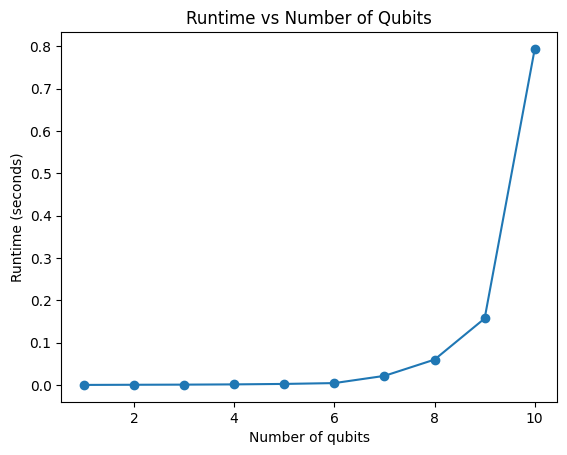

In [39]:
num_qubits_range = range(1, 11)  # From 1 to 10 qubits
runtimes_full_circ = []
runtimes_only_X = []
runtimes_XandH = []

for num_qubits in num_qubits_range:
    # Call run_simulation
    print(f"Running simulation for {num_qubits} qubits:")
    start_time_full_circ = time.time()
    final_state = run_simulation(num_qubits)
    runtime = time.time() - start_time_full_circ
    runtimes_full_circ.append(runtime)
    formatted_state = format_statevector_with_j(final_state, num_qubits)
    print(formatted_state)
    print(f"Runtime: {runtime:.6f} seconds\n")

plt.plot(num_qubits_range, runtimes_full_circ, marker='o')
plt.xlabel('Number of qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Qubits')
plt.show()

Applying X gate to all 1 qubits:
Statevector([ 0+0.j,  1+0.j],
            dims=(2,))
Runtime: 0.000087 seconds

Applying X gate to all 2 qubits:
Statevector([ 0+0.j,  0+0.j,  0+0.j,  1+0.j],
            dims=(2, 2))
Runtime: 0.000218 seconds

Applying X gate to all 3 qubits:
Statevector([ 0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  1+0.j],
            dims=(2, 2, 2))
Runtime: 0.000339 seconds

Applying X gate to all 4 qubits:
Statevector([ 0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  1+0.j],
            dims=(2, 2, 2, 2))
Runtime: 0.000556 seconds

Applying X gate to all 5 qubits:
Statevector([ 0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  0+0.j,  1+0.j],
            dims=(2, 2, 2, 2, 2))
Runtime: 0.009462 se

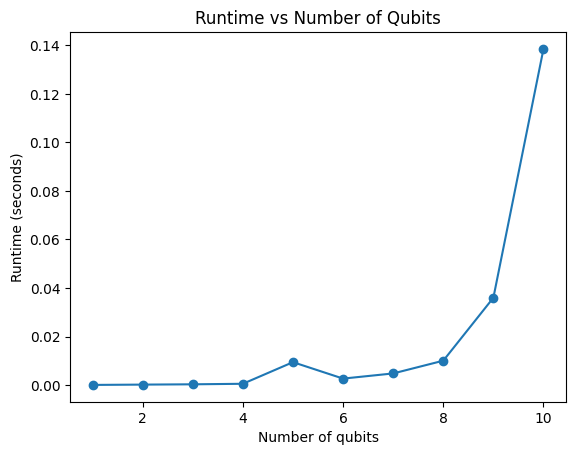

In [40]:
for num_qubits in num_qubits_range:

 # Call apply_X_to_all
    print(f"Applying X gate to all {num_qubits} qubits:")
    start_time_only_X = time.time()
    x_state = apply_X_to_all(num_qubits)
    runtime_X = time.time() - start_time_only_X
    runtimes_only_X.append(runtime_X)
    formatted_x_state = format_statevector_with_j(x_state, num_qubits)
    print(formatted_x_state)
    print(f"Runtime: {runtime_X:.6f} seconds\n")

plt.plot(num_qubits_range, runtimes_only_X, marker='o')
plt.xlabel('Number of qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Qubits')
plt.show()



Applying X followed by H gate to all 1 qubits:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
Runtime: 0.000083 seconds

Applying X followed by H gate to all 2 qubits:
Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))
Runtime: 0.000426 seconds

Applying X followed by H gate to all 3 qubits:
Statevector([ 0.35355339+0.j, -0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j],
            dims=(2, 2, 2))
Runtime: 0.000804 seconds

Applying X followed by H gate to all 4 qubits:
Statevector([ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j],
            dims=(2, 2, 2, 2))
Runtime: 0.001396 seconds

Applying X followed by H gate to all 5 qubits:
Statevector([ 0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,

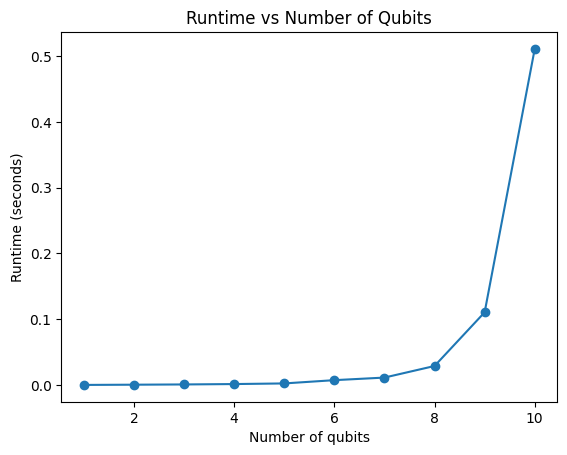

In [41]:

for num_qubits in num_qubits_range:

# Call apply_XH_to_all
    print(f"Applying X followed by H gate to all {num_qubits} qubits:")
    start_time_XH = time.time()
    xh_state = apply_XH_to_all(num_qubits)
    runtime_XH = time.time() - start_time_XH
    runtimes_XandH.append(runtime_XH)
    formatted_xh_state = format_statevector_with_j(xh_state, num_qubits)
    print(formatted_xh_state)
    print(f"Runtime: {runtime_XH:.6f} seconds\n")

plt.plot(num_qubits_range, runtimes_XandH, marker='o')
plt.xlabel('Number of qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Qubits')
plt.show()

Applying CNOT to all adjacent qubits for 1 qubits:
Statevector([ 1+0.j,  0+0.j],
            dims=(2,))
Runtime: 0.000056 seconds

Applying CNOT to all adjacent qubits for 2 qubits:
Statevector([ 0.0+0.j,  0.0+0.j,  1.0+0.j,  0.0+0.j],
            dims=(2, 2))
Runtime: 0.000351 seconds

Applying CNOT to all adjacent qubits for 3 qubits:
Statevector([ 0.0+0.j,  0.0+0.j,  1.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j],
            dims=(2, 2, 2))
Runtime: 0.000459 seconds

Applying CNOT to all adjacent qubits for 4 qubits:
Statevector([ 0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  1.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j],
            dims=(2, 2, 2, 2))
Runtime: 0.000749 seconds

Applying CNOT to all adjacent qubits for 5 qubits:
Statevector([ 0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+0.j,  0.0+

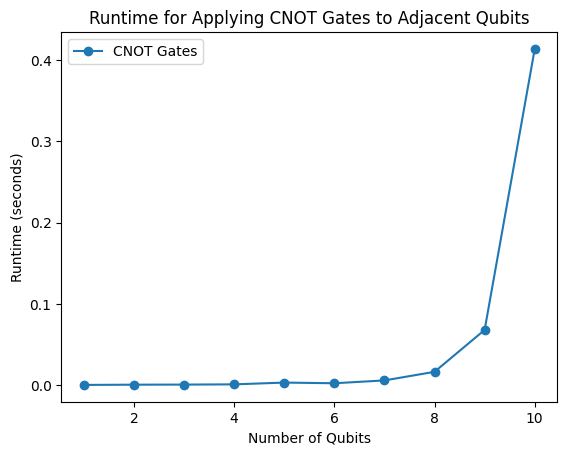

In [46]:
runtimes_CNOT = []

for num_qubits in num_qubits_range:
    # Call apply_CNOT_to_all_adjacent
    print(f"Applying CNOT to all adjacent qubits for {num_qubits} qubits:")
    start_time_cnot = time.time()
    cnot_state = apply_CNOT_only(num_qubits)
    runtime_cnot = time.time() - start_time_cnot
    runtimes_CNOT.append(runtime_cnot)

    # Format the statevector and print it
    formatted_state = format_statevector_with_j(cnot_state, num_qubits)
    print(formatted_state)
    print(f"Runtime: {runtime_cnot:.6f} seconds\n")

# Plot the runtime as a function of the number of qubits
plt.plot(num_qubits_range, runtimes_CNOT, marker='o', label='CNOT Gates')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime for Applying CNOT Gates to Adjacent Qubits')
plt.legend()
plt.show()

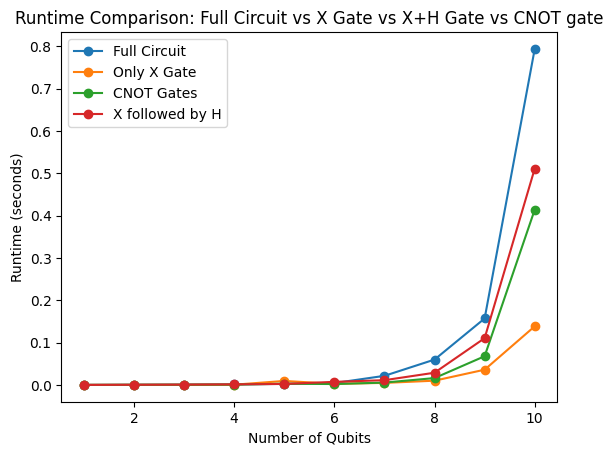

In [47]:
plt.plot(num_qubits_range, runtimes_full_circ, marker='o', label='Full Circuit')
plt.plot(num_qubits_range, runtimes_only_X, marker='o', label='Only X Gate')
plt.plot(num_qubits_range, runtimes_CNOT, marker='o', label='CNOT Gates')
plt.plot(num_qubits_range, runtimes_XandH, marker='o', label='X followed by H')

# Add labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison: Full Circuit vs X Gate vs X+H Gate vs CNOT gate')

# Add a legend to differentiate between the plots
plt.legend()

# Show the plot
plt.show()
